In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import models

In [17]:
# random dataset
filename='tBLG_raw'
trainset = pd.read_table("./Dataset/tBLG/"+filename+".csv",delimiter=";", header = 0,index_col=None)
X, Y = np.array(trainset.iloc[:,0:-1]),np.array(trainset.iloc[:,-1])
Y=Y.astype('int')

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, stratify=Y,test_size=0.25,random_state=32)

In [16]:
classification_model = models. ClassificationModels(xtrain = xtrain)
cnn_model = classification_model.Classifier_CNN()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1312, 1)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 655, 32)           128       
                                                                 
 batch_normalization_4 (Batc  (None, 655, 32)          128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 655, 32)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 327, 64)           6208      
                                                                 
 batch_normalization_5 (Batc  (None, 327, 64)          256       
 hNormalization)                                      

In [7]:
checkpoint_filepath = 'models/tBLGCNN/'+filename+'/'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath,
                monitor='val_loss', verbose=1,
                save_best_only=True, save_weights_only = True, mode='min')
train_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])
history = train_model.fit(xtrain, ytrain, epochs = 300, validation_data = (xtest, ytest), batch_size = 16, callbacks = checkpoint)

Epoch 1/300
10/10 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.8141
Epoch 1: val_loss improved from inf to 1.37330, saving model to models/tBLGCNN/tBLG_raw\
10/10 [==============================] - 11s 127ms/step - loss: 0.6283 - accuracy: 0.8141 - val_loss: 1.3733 - val_accuracy: 0.3585
Epoch 2/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.1113 - accuracy: 0.9375
Epoch 2: val_loss improved from 1.37330 to 1.37053, saving model to models/tBLGCNN/tBLG_raw\
10/10 [==============================] - 0s 31ms/step - loss: 0.2247 - accuracy: 0.9231 - val_loss: 1.3705 - val_accuracy: 0.1321
Epoch 3/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000
Epoch 3: val_loss improved from 1.37053 to 1.37006, saving model to models/tBLGCNN/tBLG_raw\
10/10 [==============================] - 0s 31ms/step - loss: 0.1095 - accuracy: 0.9615 - val_loss: 1.3701 - val_accuracy: 0.3019
Epoch 4/300
10/10 [=============================

In [8]:
check_model = model()
check_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])
check_model.load_weights(checkpoint_filepath)
check_model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 24ms/step - loss: 0.2347 - accuracy: 0.9434


[0.23465067148208618, 0.9433962106704712]

In [21]:
y_pred = check_model.predict(xtest)
y_preds_ready = y_pred.argmax(axis=1)
print(recall_score(ytest, y_preds_ready, average='macro'))

2/2 [==============================] - 0s 13ms/step
0.7410714285714286


In [22]:
print(precision_score(ytest, y_preds_ready, average='macro'))

0.7105263157894737


D:\FYProject\ganram-main\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
out = pd.DataFrame(history.history)
out

,loss,accuracy,val_loss,val_accuracy
0,0.848806,0.711538,2.005403,0.528302
1,0.196767,0.935897,1.931020,0.132075
2,0.094040,0.987179,1.851627,0.132075
3,0.071326,0.967949,1.777374,0.528302
4,0.033101,0.987179,1.718822,0.150943
...,...,...,...,...
295,0.000026,1.000000,0.311479,0.943396
296,0.000021,1.000000,0.312665,0.943396
297,0.000050,1.000000,0.313951,0.943396
298,0.000015,1.000000,0.316259,0.943396


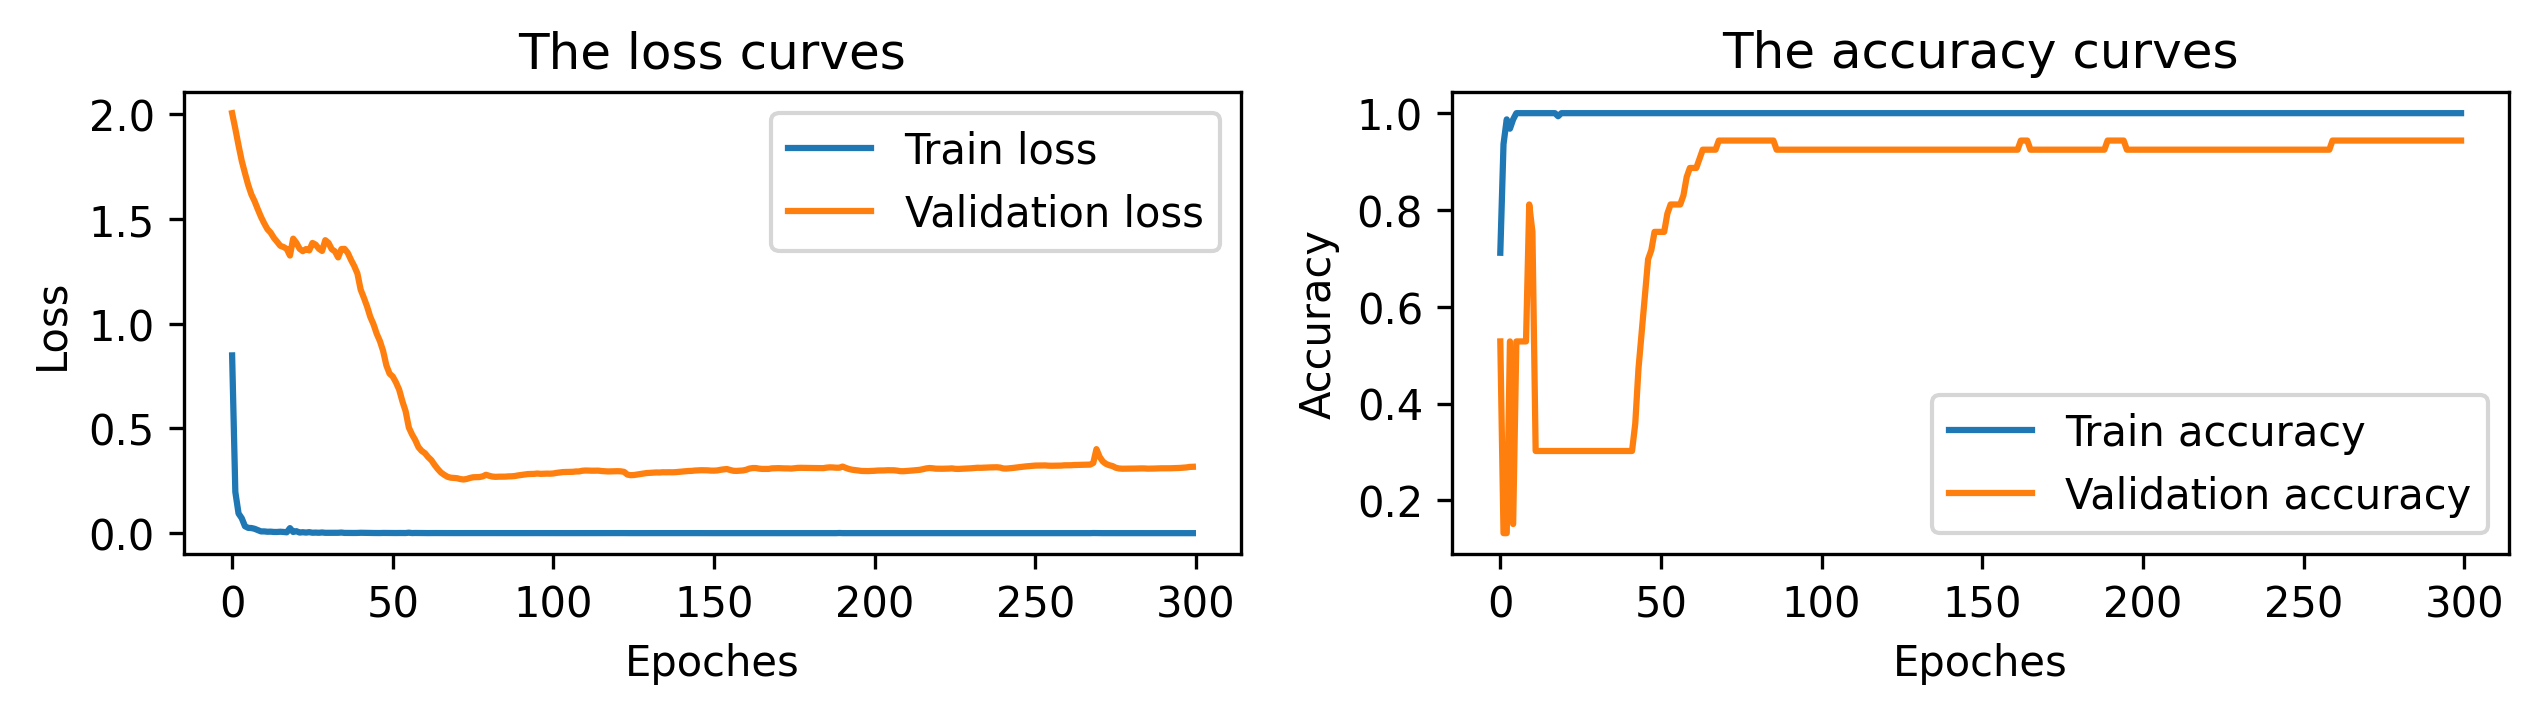

In [14]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(10,2))

ax = fig.add_subplot(1,2,1 )

ax.plot(out['loss'],label="Train loss")
ax.plot(out['val_loss'], label="Validation loss")
ax.set_xlabel('Epoches')
ax.set_ylabel('Loss')
ax.set_title('The loss curves')
ax.legend()

ax2 = fig.add_subplot(1,2,2 )
ax2.plot(out['accuracy'],label="Train accuracy")
ax2.plot(out['val_accuracy'], label="Validation accuracy")
ax2.set_xlabel('Epoches')
ax2.set_ylabel('Accuracy')
ax2.set_title('The accuracy curves')
ax2.legend()
plt.show()

In [30]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=10):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm_norm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

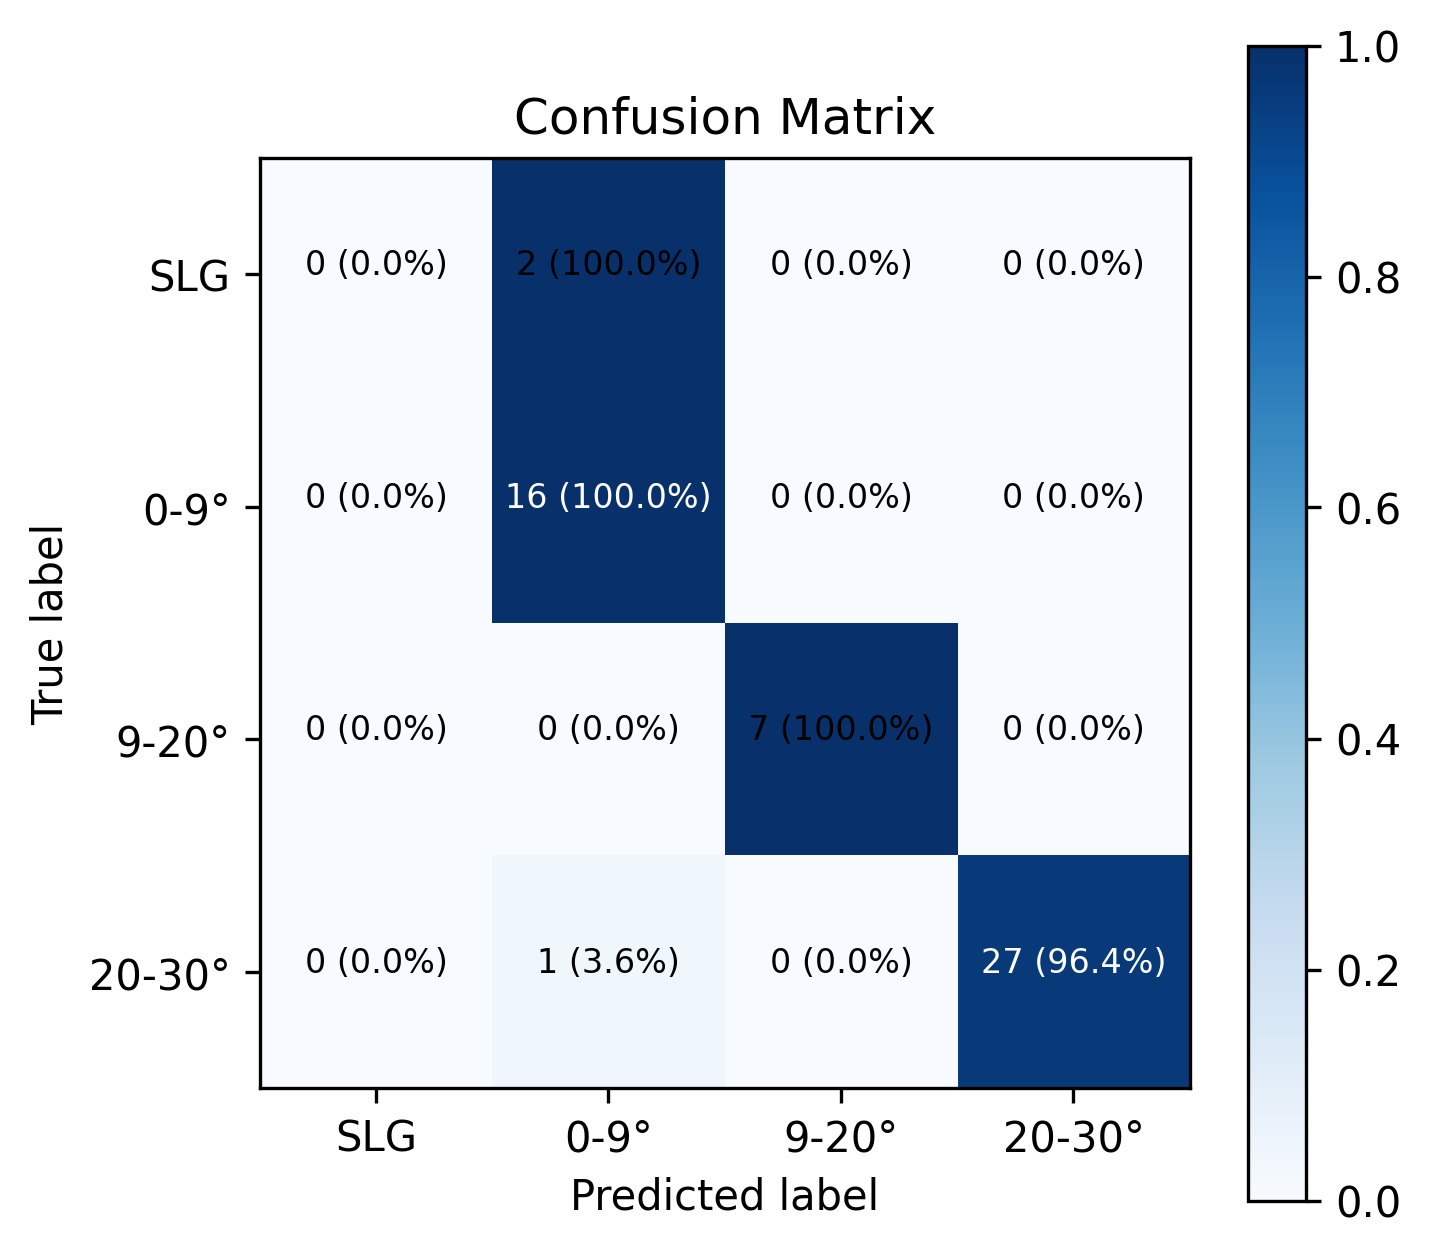

In [33]:
make_confusion_matrix(y_true=ytest,
                      y_pred=y_preds_ready,
                      classes=['SLG', '0-9°', '9-20°', '20-30°'],
                      # figsize=(15, 15),
                      text_size=8)

In [18]:
layer_dict = dict([(layer.name, layer) for layer in check_model.layers])
layer_dict


{'reshape_2': <keras.layers.reshaping.reshape.Reshape at 0x21836954400>,
 'conv1d_8': <keras.layers.convolutional.conv1d.Conv1D at 0x2184bef3ac0>,
 'batch_normalization_8': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x218369576a0>,
 'leaky_re_lu_8': <keras.layers.activation.leaky_relu.LeakyReLU at 0x2184f59c790>,
 'conv1d_9': <keras.layers.convolutional.conv1d.Conv1D at 0x21836925c10>,
 'batch_normalization_9': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x2184bf06fd0>,
 'leaky_re_lu_9': <keras.layers.activation.leaky_relu.LeakyReLU at 0x2184f599f70>,
 'conv1d_10': <keras.layers.convolutional.conv1d.Conv1D at 0x2184f5a4340>,
 'batch_normalization_10': <keras.layers.normalization.batch_normalization.BatchNormalization at 0x2184befa970>,
 'leaky_re_lu_10': <keras.layers.activation.leaky_relu.LeakyReLU at 0x2184bf0bc40>,
 'conv1d_11': <keras.layers.convolutional.conv1d.Conv1D at 0x2184befca60>,
 'batch_normalization_11': <keras.layers.n

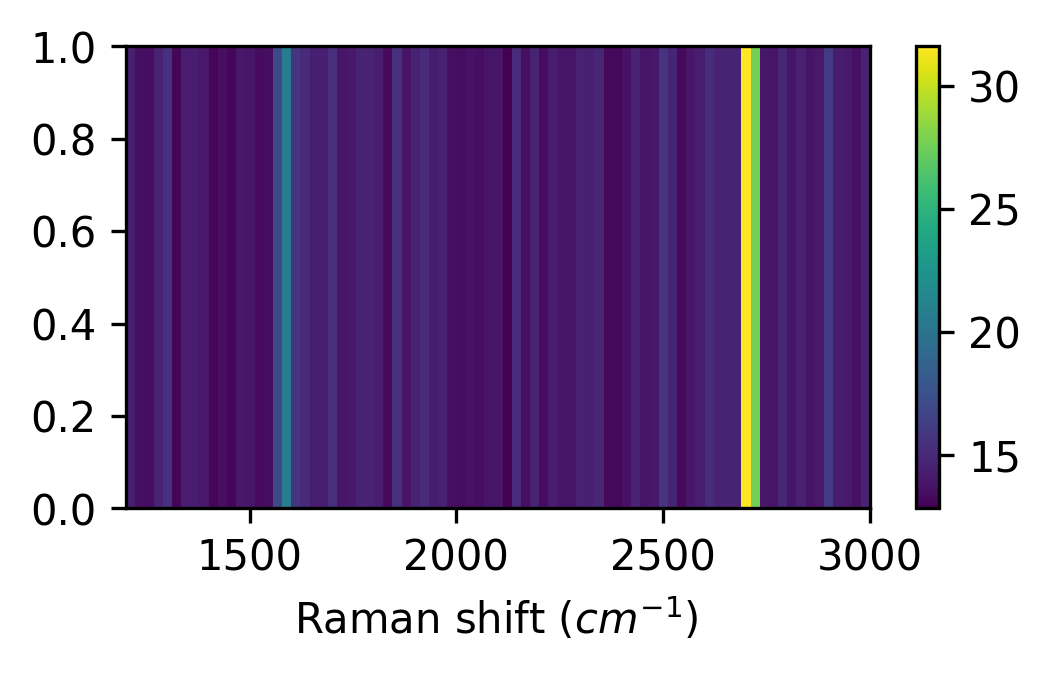

In [19]:
plt.rcParams['figure.dpi'] = 300
def grad_cam(layer_name, data):
    grad_model = tf.keras.models.Model(
        [check_model.inputs], [check_model.get_layer(layer_name).output, check_model.output]
    )
    last_conv_layer_output, preds = grad_model(data)

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(data)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output * pooled_grads
    heatmap = tf.reduce_mean(heatmap, axis=(1))
    heatmap = np.expand_dims(heatmap,0)
    return heatmap


layer_name = "conv1d_11"

heatmap=np.zeros_like(grad_cam(layer_name,xtest))
for i in xtest:
    data = np.expand_dims(i,0)
    heatmap = (grad_cam(layer_name,data) - grad_cam(layer_name,data).min(axis=1))/(grad_cam(layer_name,data).max(axis=1) - grad_cam(layer_name,data).min(axis=1)) + heatmap

plt.figure(figsize=(4,2))
plt.imshow(np.expand_dims(heatmap,axis=2), aspect="auto", interpolation='nearest',extent=[1200,3000,i.min(),i.max()])
plt.colorbar()
plt.xlabel('Raman shift $(cm^{-1})$ ')
plt.show()

# plt.plot(i,'k')
# plt.show()

In [81]:
def ready_model():
    model_train = model()
    return model_train


def get_model_name(k, name):
    return 'model_'+name+str(k)+'.h5'

def KFoldcnn(filename):
    kfold = KFold(n_splits=10, shuffle=True)
    trainset = pd.read_table('./Dataset/tBLG/'+filename +'.csv',delimiter=";", header = 0)
    X, Y = np.array(trainset.iloc[:,0:-1]),np.array(trainset.iloc[:,-1])
    Y=Y.astype('int')


    name = "crossval"
    accuracy = []
    recall = []
    fold_no = 10
    for train, test  in kfold.split(X, Y):
        train_model = ready_model()
        train_model.compile(optimizer = Adam(learning_rate=0.0001),
                            loss = SparseCategoricalCrossentropy(),
                            metrics = ['accuracy'])
        print(f'training fold number {fold_no}')

        save_dir = './models/KFold/'+ filename +'crossval/'
        checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_no, name),
                monitor='val_accuracy', verbose=1,
                save_best_only=True, mode='max')

        callbacks_list = [checkpoint]

        history = train_model.fit(X[train], Y[train], epochs = 100,
                                validation_data = (X[test], Y[test]),
                                batch_size = 16,
                                callbacks = callbacks_list,
                                verbose = 0)


        train_model.load_weights(save_dir+get_model_name(fold_no, name))
        scores = train_model.evaluate(X[test], Y[test], verbose=0)
        accuracy.append(scores[1])
        y_pred = train_model.predict(X[test])
        y_preds_ready = y_pred.argmax(axis=1)
        recall.append(recall_score(Y[test], y_preds_ready, average='macro'))
        fold_no+=1
    print("score per fold:")
    for i in range(10):
        print(f'Accuracy in fold {i+1}: {accuracy[i]*100}, Recall in fold {i+1} : {recall[i]*100}')

    print(f"the Averrage Accuracy score for 10 fold cross validation is {sum(accuracy)/10 *100} and recall is {sum(recall)/10*100}")
    print(accuracy)
    print(recall)


In [82]:
KFoldcnn('tBLG_raw')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to ./models/KFold/tBLG_rawcrossval\model_crossval10.h5

Epoch 2: val_accuracy improved from 0.33333 to 0.90476, saving model to ./models/KFold/tBLG_rawcrossval\model_crossval10.h5

Epoch 3: val_accuracy did not improve from 0.90476

Epoch 4: val_accuracy did not improve from 0.90476

Epoch 5: val_accuracy did not improve from 0.90476

Epoch 6: val_accuracy did not improve from 0.90476

Epoch 7: val_accuracy did not improve from 0.90476

Epoch 8: val_accuracy did not improve from 0.90476

Epoch 9: val_accuracy did not improve from 0.90476

Epoch 10: val_accuracy did not improve from 0.90476

Epoch 11: val_accuracy did not improve from 0.90476

Epoch 12: val_accuracy did not improve from 0.90476

Epoch 13: val_accuracy did not improve from 0.90476

Epoch 14: val_accuracy did not improve from 0.90476

Epoch 15: val_accuracy did not improve from 0.90476

Epoch 16: val_accuracy did not improve from 0.

In [69]:
KFoldcnn('2DSNR40')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/KFold/2DSNR40crossval\model_crossval10.h5

Epoch 2: val_accuracy did not improve from 0.50000

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: val_accuracy did not improve from 0.50000

Epoch 6: val_accuracy did not improve from 0.50000

Epoch 7: val_accuracy did not improve from 0.50000

Epoch 8: val_accuracy did not improve from 0.50000

Epoch 9: val_accuracy did not improve from 0.50000

Epoch 10: val_accuracy did not improve from 0.50000

Epoch 11: val_accuracy did not improve from 0.50000

Epoch 12: val_accuracy did not improve from 0.50000

Epoch 13: val_accuracy did not improve from 0.50000

Epoch 14: val_accuracy did not improve from 0.50000

Epoch 15: val_accuracy did not improve from 0.50000

Epoch 16: val_accuracy did not improve from 0.50000

Epoch 17: val_accuracy did not improve from 0.50000

Epoch 18: val_

In [70]:
KFoldcnn('2Draw')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.84483, saving model to ./models/KFold/2Drawcrossval\model_crossval10.h5

Epoch 2: val_accuracy did not improve from 0.84483

Epoch 3: val_accuracy did not improve from 0.84483

Epoch 4: val_accuracy did not improve from 0.84483

Epoch 5: val_accuracy did not improve from 0.84483

Epoch 6: val_accuracy did not improve from 0.84483

Epoch 7: val_accuracy did not improve from 0.84483

Epoch 8: val_accuracy did not improve from 0.84483

Epoch 9: val_accuracy did not improve from 0.84483

Epoch 10: val_accuracy did not improve from 0.84483

Epoch 11: val_accuracy did not improve from 0.84483

Epoch 12: val_accuracy did not improve from 0.84483

Epoch 13: val_accuracy did not improve from 0.84483

Epoch 14: val_accuracy did not improve from 0.84483

Epoch 15: val_accuracy did not improve from 0.84483

Epoch 16: val_accuracy did not improve from 0.84483

Epoch 17: val_accuracy did not improve from 0.84483

Epoch 18: val_ac

In [74]:
KFoldcnn('2D_DDPMSNR0')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.75857, saving model to ./models/KFold/2D_DDPMSNR0crossval\model_crossval10.h5

Epoch 2: val_accuracy did not improve from 0.75857

Epoch 3: val_accuracy did not improve from 0.75857

Epoch 4: val_accuracy did not improve from 0.75857

Epoch 5: val_accuracy improved from 0.75857 to 0.77857, saving model to ./models/KFold/2D_DDPMSNR0crossval\model_crossval10.h5

Epoch 6: val_accuracy improved from 0.77857 to 0.87714, saving model to ./models/KFold/2D_DDPMSNR0crossval\model_crossval10.h5

Epoch 7: val_accuracy improved from 0.87714 to 0.92714, saving model to ./models/KFold/2D_DDPMSNR0crossval\model_crossval10.h5

Epoch 8: val_accuracy improved from 0.92714 to 0.94286, saving model to ./models/KFold/2D_DDPMSNR0crossval\model_crossval10.h5

Epoch 9: val_accuracy did not improve from 0.94286

Epoch 10: val_accuracy did not improve from 0.94286

Epoch 11: val_accuracy improved from 0.94286 to 0.94857, saving model to ./mo

In [77]:
KFoldcnn('2D_DDPMSNR40')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.79714, saving model to ./models/KFold/2D_DDPMSNR40crossval\model_crossval10.h5

Epoch 2: val_accuracy did not improve from 0.79714

Epoch 3: val_accuracy did not improve from 0.79714

Epoch 4: val_accuracy improved from 0.79714 to 0.88429, saving model to ./models/KFold/2D_DDPMSNR40crossval\model_crossval10.h5

Epoch 5: val_accuracy improved from 0.88429 to 0.93714, saving model to ./models/KFold/2D_DDPMSNR40crossval\model_crossval10.h5

Epoch 6: val_accuracy did not improve from 0.93714

Epoch 7: val_accuracy did not improve from 0.93714

Epoch 8: val_accuracy did not improve from 0.93714

Epoch 9: val_accuracy did not improve from 0.93714

Epoch 10: val_accuracy did not improve from 0.93714

Epoch 11: val_accuracy did not improve from 0.93714

Epoch 12: val_accuracy improved from 0.93714 to 0.93857, saving model to ./models/KFold/2D_DDPMSNR40crossval\model_crossval10.h5

Epoch 13: val_accuracy improved from 0.9385

In [76]:
KFoldcnn('2D_DDPM')

training fold number 10

Epoch 1: val_accuracy improved from -inf to 0.12571, saving model to ./models/KFold/2D_DDPMcrossval\model_crossval10.h5

Epoch 2: val_accuracy improved from 0.12571 to 0.16429, saving model to ./models/KFold/2D_DDPMcrossval\model_crossval10.h5

Epoch 3: val_accuracy improved from 0.16429 to 0.30429, saving model to ./models/KFold/2D_DDPMcrossval\model_crossval10.h5

Epoch 4: val_accuracy improved from 0.30429 to 0.82286, saving model to ./models/KFold/2D_DDPMcrossval\model_crossval10.h5

Epoch 5: val_accuracy improved from 0.82286 to 1.00000, saving model to ./models/KFold/2D_DDPMcrossval\model_crossval10.h5

Epoch 6: val_accuracy did not improve from 1.00000

Epoch 7: val_accuracy did not improve from 1.00000

Epoch 8: val_accuracy did not improve from 1.00000

Epoch 9: val_accuracy did not improve from 1.00000

Epoch 10: val_accuracy did not improve from 1.00000

Epoch 11: val_accuracy did not improve from 1.00000

Epoch 12: val_accuracy did not improve from 